# Regresión en series de tiempo

Predecir el precio del peso colombiano con respecto al dólar estadounidense utilizando los modelos autoregresivos
(AR), de medias móviles(MA
) y autoregresivos
 de medias móviles(ARMA). Adicionalmente primero realizar un análisis exploratorio utilizando las gráficas de la función de autocorrelación y fase, para intuir posibles dependencias lineales entre la muestra actual y las pasadas en el dominio tiempo

### Librerías

In [1]:
!python -m pip install gdown

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gdown: filename=gdown-4.0.1-py3-none-any.whl size=10596 sha256=21414212575d9875da3f0175ede11ef0f54ec48710b6addb8570a6f65154d469
  Stored in directory: c:\users\gcast\appdata\local\pip\cache\wheels\ce\60\19\e905d4b7c27942a0c9be8ff3b2748f635070a2fae7d75f0cbc
Successfully built gdown


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARMA

### Database

In [3]:
#FILEID = "1_nV8BNqvVzmJ5JN6la2L62a-VLPX8-kU"
#!python3 -m wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O PesovsDolar.xlsx && rm -rf /tmp/cookies.txt

In [4]:
import gdown

url = 'https://drive.google.com/uc?id=1_nV8BNqvVzmJ5JN6la2L62a-VLPX8-kU'
output = 'PesovsDolar.xlsx'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1_nV8BNqvVzmJ5JN6la2L62a-VLPX8-kU
To: C:\Users\gcast\Dropbox\Python\StochasticProc\PesovsDolar.xlsx
100%|██████████| 163k/163k [00:00<00:00, 1.72MB/s]


'PesovsDolar.xlsx'

In [5]:
df = pd.read_excel('./PesovsDolar.xlsx')
time = np.array(df['Date (DD/MM/YYYY)'].dt.date, dtype=np.str)[::-1]
x = np.array(df['Market Exchange Rate (Colombian pesos per USD)'])[::-1]

In [6]:
df.head()

,Date (DD/MM/YYYY),Market Exchange Rate (Colombian pesos per USD)
0,2021-04-08,3639.62
1,2021-04-07,3645.14
2,2021-04-06,3645.79
3,2021-04-05,3678.62
4,2021-04-04,3678.62


### Time Serie EDA

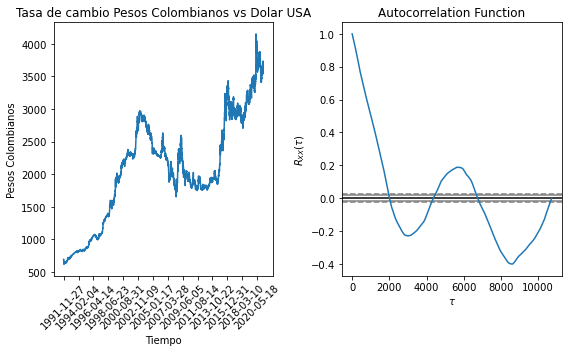

In [7]:
fig1, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].plot(time, x)
axs[0].set_title('Tasa de cambio Pesos Colombianos vs Dolar USA')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Pesos Colombianos')
axs[0].set_xticks(np.arange(0,x.shape[0],800))
axs[0].set_xticklabels(labels=time[np.arange(0,x.shape[0],800)], rotation=45)

autocorrelation_plot(x, axs[1])
axs[1].set_title('Autocorrelation Function')
axs[1].set_xlabel(r'$\tau$')
axs[1].set_ylabel(r'$R_{XX}(\tau)$')
axs[1].grid(False)

fig1.tight_layout()

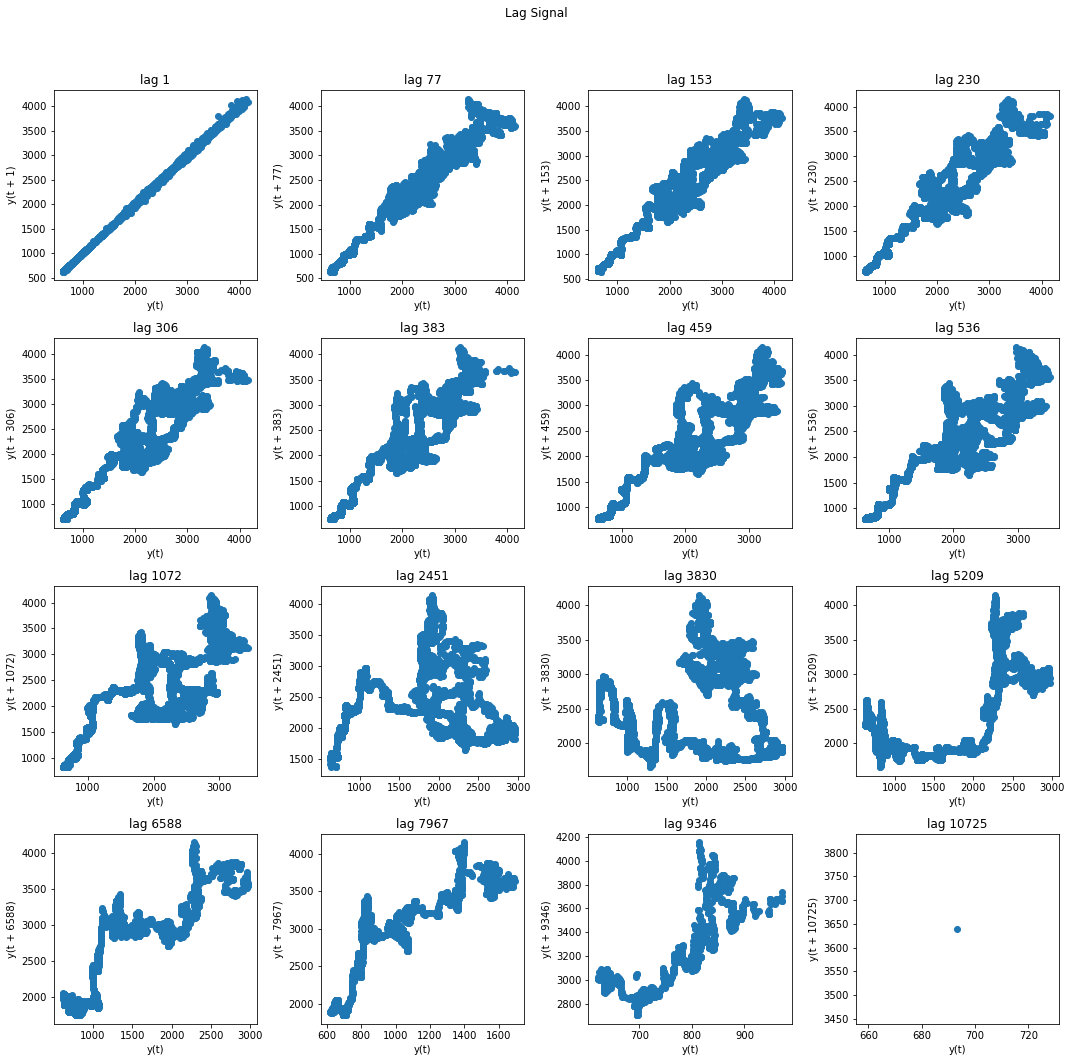

In [8]:
fig2, axs = plt.subplots(4, 4, figsize=(15, 15))
fig2.suptitle('Lag Signal')

lags = np.concatenate([np.linspace(1, x.shape[0]/20, 8, dtype=np.int), np.linspace(x.shape[0]/10, x.shape[0]-1, 8, dtype=np.int)])
x_series = pd.Series(x)
for i,ax in enumerate(axs.flat):
  ax.set_title('lag '+str(lags[i]))
  lag_plot(x_series, lags[i], ax)
  
fig2.tight_layout(rect=[0, 0, 1, 0.95])

### AR Model for fitting Time Serie

In [9]:
maximum_order = 10

orders = []
AR_models = []
AR_results = []
BIC = []
AIC = []

best_order = None
best_AR_model = None
best_AR_result = None
best_bic = np.inf
best_aic = None

for i in np.arange(1,maximum_order+1):
  model_AR = ARMA(x, order=(i,0))
  result_AR = model_AR.fit()

  if result_AR.bic < best_bic:
    best_order = i
    best_AR_model = model_AR
    best_AR_result = result_AR
    best_bic = result_AR.bic
    best_aic = result_AR.bic

  orders.append(i)
  AR_models.append(model_AR)
  AR_results.append(result_AR)
  BIC.append(result_AR.bic)
  AIC.append(result_AR.aic)

C:\Users\gcast\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\gcast\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

In [10]:
print('Best Order :',best_order)
print(best_AR_result.summary())

Best Order : 4
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                10726
Model:                     ARMA(4, 0)   Log Likelihood              -42769.748
Method:                       css-mle   S.D. of innovations             13.041
Date:                Tue, 05 Oct 2021   AIC                          85551.495
Time:                        16:31:57   BIC                          85595.178
Sample:                             0   HQIC                         85566.230
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2075.6915   1033.711      2.008      0.045      49.654    4101.729
ar.L1.y        1.1175      0.001   1733.782      0.000       1.116       1.119
ar.L2.y       -0.1433      0.006    -

In [11]:
y_pred = best_AR_model.predict(best_AR_result.params)

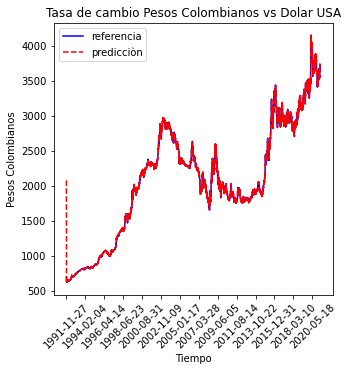

In [12]:
fig3, axs = plt.subplots(1, 1, figsize=(5,5))
axs.plot(time, x, 'b')
axs.plot(time, y_pred, 'r--')
axs.set_title('Tasa de cambio Pesos Colombianos vs Dolar USA')
axs.set_xlabel('Tiempo')
axs.set_ylabel('Pesos Colombianos')
axs.set_xticks(np.arange(0,x.shape[0],800))
axs.set_xticklabels(labels=time[np.arange(0,x.shape[0],800)], rotation=45)
axs.legend(labels=['referencia','predicciòn'], loc='upper left')

In [13]:
error = x - y_pred
print('MSE :',error.dot(error.T)/error.shape[0])

MSE : 348.21568380635296


###  MA Model for fitting Time Serie

In [14]:
maximum_order = 10

orders = []
MA_models = []
MA_results = []
BIC = []
AIC = []

best_order = None
best_MA_model = None
best_MA_result = None
best_bic = np.inf
best_aic = None


for i in np.arange(1,maximum_order+1):
  try:
      model_MA = ARMA(x, order=(0,i))
      result_MA = model_MA.fit()

      if result_MA.bic < best_bic:
        best_order = i
        best_MA_model = model_MA
        best_MA_result = result_MA
        best_bic = result_MA.bic
        best_aic = result_MA.bic

      orders.append(i)
      MA_models.append(model_MA)
      MA_results.append(result_MA)
      BIC.append(result_MA.bic)
      AIC.append(result_MA.aic)
  except:
    continue

C:\Users\gcast\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [15]:
print('Best Order :',best_order)
print(best_MA_result.summary())

Best Order : 1
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                10726
Model:                     ARMA(0, 1)   Log Likelihood              -79582.601
Method:                       css-mle   S.D. of innovations            403.617
Date:                Tue, 05 Oct 2021   AIC                         159171.202
Time:                        16:32:01   BIC                         159193.044
Sample:                             0   HQIC                        159178.570
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2075.6923      7.763    267.398      0.000    2060.478    2090.907
ma.L1.y        0.9919      0.001   1143.497      0.000       0.990       0.994
                                    R

In [16]:
y_pred = best_MA_model.predict(best_MA_result.params)

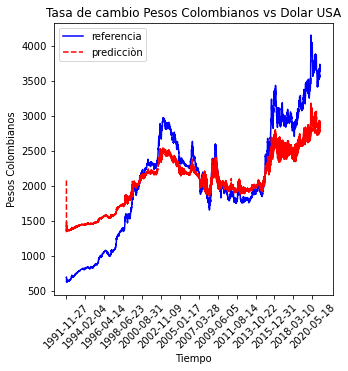

In [17]:
fig3, axs = plt.subplots(1, 1, figsize=(5,5))
axs.plot(time, x, 'b')
axs.plot(time, y_pred, 'r--')
axs.set_title('Tasa de cambio Pesos Colombianos vs Dolar USA')
axs.set_xlabel('Tiempo')
axs.set_ylabel('Pesos Colombianos')
axs.set_xticks(np.arange(0,x.shape[0],800))
axs.set_xticklabels(labels=time[np.arange(0,x.shape[0],800)], rotation=45)
axs.legend(labels=['referencia','predicciòn'], loc='upper left')

In [18]:
error = x - y_pred
print('MSE :',error.dot(error.T)/error.shape[0])

MSE : 163167.31665241715


###  ARMA Model for fitting Time Serie

In [19]:
maximum_order = 4

orders = []
ARMA_models = []
ARMA_results = []
BIC = []
AIC = []

best_order = None
best_ARMA_model = None
best_ARMA_result = None
best_bic = np.inf
best_aic = None

for i in np.arange(1,maximum_order+1):
  for j in np.arange(1,maximum_order+1):
    try:
        model_ARMA = ARMA(x, order=(i,j))
        result_ARMA = model_ARMA.fit()

        if result_ARMA.bic < best_bic:
          best_order = i,j
          best_ARMA_model = model_ARMA
          best_ARMA_result = result_ARMA
          best_bic = result_ARMA.bic
          best_aic = result_ARMA.bic

        orders.append((i,j))
        ARMA_models.append(model_ARMA)
        ARMA_results.append(result_ARMA)
        BIC.append(result_ARMA.bic)
        AIC.append(result_ARMA.aic)
    except:
        continue

C:\Users\gcast\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
print('Best Order :',best_order)
print(best_ARMA_result.summary())

Best Order : (3, 1)
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                10726
Model:                     ARMA(3, 1)   Log Likelihood              -42767.053
Method:                       css-mle   S.D. of innovations             13.038
Date:                Tue, 05 Oct 2021   AIC                          85546.106
Time:                        16:32:54   BIC                          85589.788
Sample:                             0   HQIC                         85560.841
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2075.7029   1056.296      1.965      0.049       5.401    4146.005
ar.L1.y        0.2379        nan        nan        nan         nan         nan
ar.L2.y        0.8395        nan

C:\Users\gcast\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [21]:
y_pred = best_ARMA_model.predict(best_ARMA_result.params)

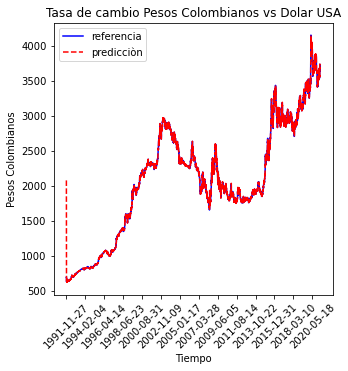

In [22]:
fig3, axs = plt.subplots(1, 1, figsize=(5,5))
axs.plot(time, x, 'b')
axs.plot(time, y_pred, 'r--')
axs.set_title('Tasa de cambio Pesos Colombianos vs Dolar USA')
axs.set_xlabel('Tiempo')
axs.set_ylabel('Pesos Colombianos')
axs.set_xticks(np.arange(0,x.shape[0],800))
axs.set_xticklabels(labels=time[np.arange(0,x.shape[0],800)], rotation=45)
axs.legend(labels=['referencia','predicciòn'], loc='upper left')

In [23]:
error = x - y_pred
print('MSE :',error.dot(error.T)/error.shape[0])

MSE : 348.1335346057789


### REFERENCIAS 

* [Autoregression Models for Time Series Forecasting With Python](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/)